# Test data loader

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


class car cat cat ship plane bird truck frog


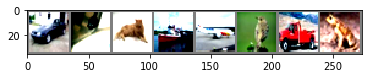

In [2]:
from data.data import CIFARData
from config import configs
data = CIFARData(configs)
data.show_batch("train")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


class dog cat car dog bird deer dog frog


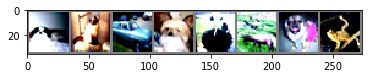

In [3]:
data.show_batch("train")

# Test trainer

In [4]:
from train.train import Trainer
trainer = Trainer(configs, data)

In [5]:
trainer.train()

Epoch 0 step 0
	Loss average 0.001156


KeyboardInterrupt: 

In [ ]:
trainer.load_checkpoint("checkpoint_1")

In [ ]:
trainer.evaluate("test")

In [ ]:
from utils.metric import abs
trainer.evaluate("test", abs)

In [ ]:
trainer.update_lr(0.01)